#Lab 3 : Convex Optimisation

Gradient Descent 

**Write the code following the instructions to obtain the desired results**

#Import all the required libraries

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
def solver(_lambda, x_init, max_iter, epsilon, max_val, sols, grad, func):
    figure, axis = plt.subplots(len(_lambda), len(x_init), figsize=(7*len(x_init), 7*len(_lambda)))
    min_err = float('inf')
    for i, lr in enumerate(_lambda):
        for j, x in enumerate(x_init):
            x_test = [x]
            for t in range(max_iter):
                x = x - lr * grad(x)
                x_test.append(x)
                if abs(lr * grad(x))<epsilon: break
                if abs(lr * grad(x))>max_val: break
            x_test = np.array(x_test)
            y_test = func(x_test)
            delta = abs(np.max(x_test)-np.min(x_test))
            X = np.linspace(start=np.min(x_test)-delta, stop=np.max(x_test)+delta, num=1000)
            Y = func(X)
            axis[i, j].plot(X, Y)
            for sol in sols:
                axis[i, j].plot([sol], [func(sol)], marker='x', color='green')
            err = round(abs(x-sols[0]), 7)
            axis[i, j].plot(x_test, y_test, color='black')
            axis[i, j].set_title(f'LR: {lr}, x_init: {x_init[j]}, iter: {t}, err: {err}')
            axis[i, j].set_xlabel(f'x_sol: {round(x, 7)}')
            axis[i, j].set_ylabel('f(x)')
            if err<min_err:
                min_err = err
                min_sol = x
    print("-"*100)
    print(f'The value at which f(x) is minimum is: x = {min_sol}')
    print("-"*100)
    

In [15]:
def plotter(x, func, sols):
    y = func(x)
    plt.plot(x, y)
    for sol in sols:
        plt.plot([sol], [func(sol)], marker='x', color='green')
    plt.title(f'Plot of x vs f(x), Min at x={sol}')
    plt.xlabel('x')
    plt.ylabel('f(x)')

In [ ]:
def solver_2D(_lambda, p_init, max_iter, epsilon, max_val, sols, grad_x, grad_y, func):
    figure, axis = plt.subplots(len(_lambda), len(p_init), figsize=(7*len(p_init), 7*len(_lambda)))
    min_err = float('inf')
    for i, lr in enumerate(_lambda):
        for j, x, y in enumerate(p_init):
            x_test = [x]
            y_test = [y]
            for t in range(max_iter):
                x = x - lr * grad_x(x, y)
                y = x - lr * grad_y(x, y)
                x_test.append(x)
                y_test.append(y)
                if abs(lr * grad_x(x, y)) + abs(lr * grad_y(x, y))<epsilon: break
                if abs(lr * grad_x(x, y)) + abs(lr * grad_y(x, y))>max_val: break
            x_test = np.array(x_test)
            y_test = np.array(y_test)
            z_test = func(x_test, y_test)
            delta_x = abs(np.max(x_test)-np.min(x_test))
            delta_y = abs(np.max(y_test)-np.min(y_test))
            X = np.linspace(start=np.min(x_test)-delta_x, stop=np.max(x_test)+delta_y, num=1000)
            Y = np.linspace(start=np.min(y_test)-delta_x, stop=np.max(y_test)+delta_y, num=1000)
            Z = func(X, Y)
            axis[i, j].contour(X, Y, Z)
            err = round(abs(x-sols[0][0]), 7) + round(abs(y-sols[0][1]), 7)
            axis[i, j].plot(x_test, y_test, color='black')
            axis[i, j].plot([sols[0]], [sols[1]], color='black')
            axis[i, j].set_title(f'LR: {lr}, p_init: {p_init}, iter: {t}, err: {err}')
            axis[i, j].set_xlabel(f'x_sol: {round(x, 7)}')
            axis[i, j].set_ylabel(f'y_sol: {round(y, 7)}')
            if err<min_err:
                min_err = err
                min_sol = (x, y)
    print("-"*100)
    print(f'The value at which f(x, y) is minimum is: x = {min_sol[0]}, y = {min_sol[1]}')
    print("-"*100)

In [ ]:
def plotter_3D(x, y, func):
    X, Y = np.meshgrid(x, y)
    z = func(X, Y)
    fig1 = plt.figure(figsize=(7, 7))
    ax1 = plt.axes(projection='3d')
    ax1.plot_surface(x, y, z)
    ax1.title(f'3D Surface plot of x, y vs f(x, y)')
    ax1.xlabel('x')
    ax1.ylabel('y')
    ax1.zlabel('z')
    
    fig2 = plt.figure(figsize=(7, 7))
    ax2 = plt.axes(projection='3d')
    ax2.contour3D(x, y, z)
    ax2.title(f'3D Contour plot of x, y vs f(x, y)')
    ax2.xlabel('x')
    ax2.ylabel('y')
    ax2.zlabel('z')
    

# Find the value of $x$ at which $f(x)$ is minimum : 
1. Find $x$ analytically
2. Write the update equation of gradient descent
3. Find $x$ using gradient descent method 



**Example 1** : $f(x)$ = $x^{2}$ + $x$ + $2$

**Analytical** : $$\frac{d}{dx} f(x)=2x+1=0$$
$$\frac{d^{2}}{dx^{2}} f(x)=2~(Minima)$$
$$x=-\frac{1}{2}~(analytical~solution)$$

**Gradient Descent Update equation** : $$x_{init}=4$$
$$x_{updt}=x_{old}-\lambda (\frac{d}{dx} f(x)|x=x_{old})$$
$$x_{updt}=x_{old}-\lambda (2x_{old}+1)$$

**Gradient Descent Method** :

Follow the below steps and write your code in the block below

1. Generate $x$, 1000 data points from -10 to 10
2. Generate and Plot the function $f(x)$ = $x^{2}$ + $x$ + $2$
3. Initialize the starting point ($x_{init}$) and learning rate ($\lambda$)
4. Use Gradient descent algorithm to compute value of $x$ at which the function $f(x)$ is minimum
5. Also vary the learning rate and initialisation point and plot your observations

----------------------------------------------------------------------------------------------------
The value at which f(x) is minimum is: x = -0.49999568449255694
----------------------------------------------------------------------------------------------------


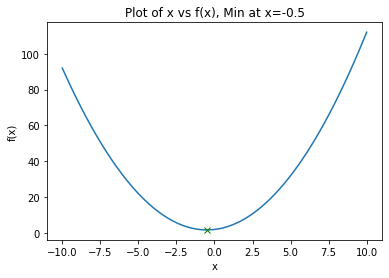

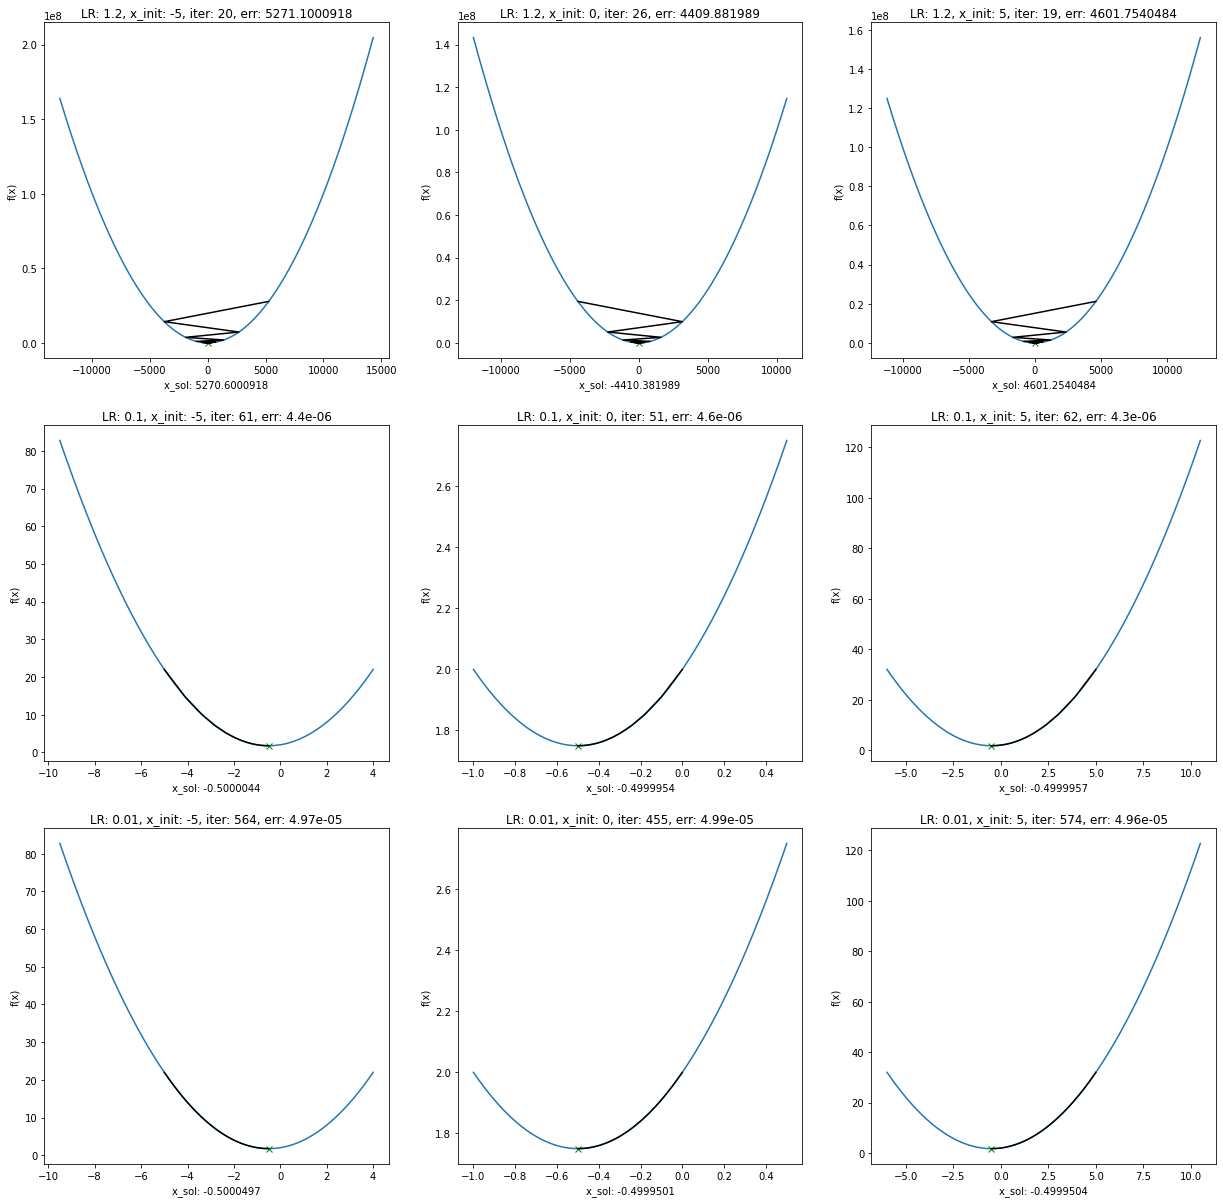

In [17]:
x = np.linspace(start=-10, stop=10, num=1000)

_lambda = [1.2, 0.1, 0.01]
x_init = [-5, 0, 5]
max_iter = int(1e5)
epsilon = 1e-6
max_val = int(1e4)
func = lambda X: np.power(X, 2) + X + 2
grad = lambda x: 2*x+1
sols = [-0.5]

plotter(x, func, sols)

solver(_lambda, x_init, max_iter, epsilon, max_val, sols, grad, func)

**Example 2** : $f(x)=x sinx$

**Analytical** : Find solution analytically
$$\frac{d}{dx} f(x)=sinx + x cosx=0$$
$$\frac{d^{2}}{dx^{2}} f(x)=2 cosx - x sinx~(Minima / Maxima)$$
$$x=-tanx$$
$$x \approx 4.193~(analytical~solution)$$

**Gradient Descent Update equation** : Write Gradient descent update equations
$$x_{init}=3$$
$$x_{updt}=x_{old}-\lambda (\frac{d}{dx} f(x)|x=x_{old})$$
$$x_{updt}=x_{old}-\lambda (sinx_{old} + x_{old} cosx_{old}=0)$$


**Gradient Descent Method** :

Follow the below steps and write your code in the block below

1. Generate $x$, 1000 data points from -10 to 10
2. Generate and Plot the function $f(x)=x sinx$
3. Initialize the starting point ($x_{init}$) and learning rate ($\lambda$)
4. Use Gradient descent algorithm to compute value of $x$ at which the function $f(x)$ is minimum
5. Also vary the learning rate and initialisation point and plot your observations

----------------------------------------------------------------------------------------------------
The value at which f(x) is minimum is: x = 4.913161356155126
----------------------------------------------------------------------------------------------------


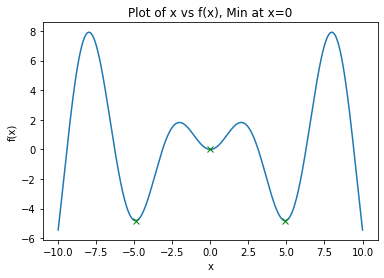

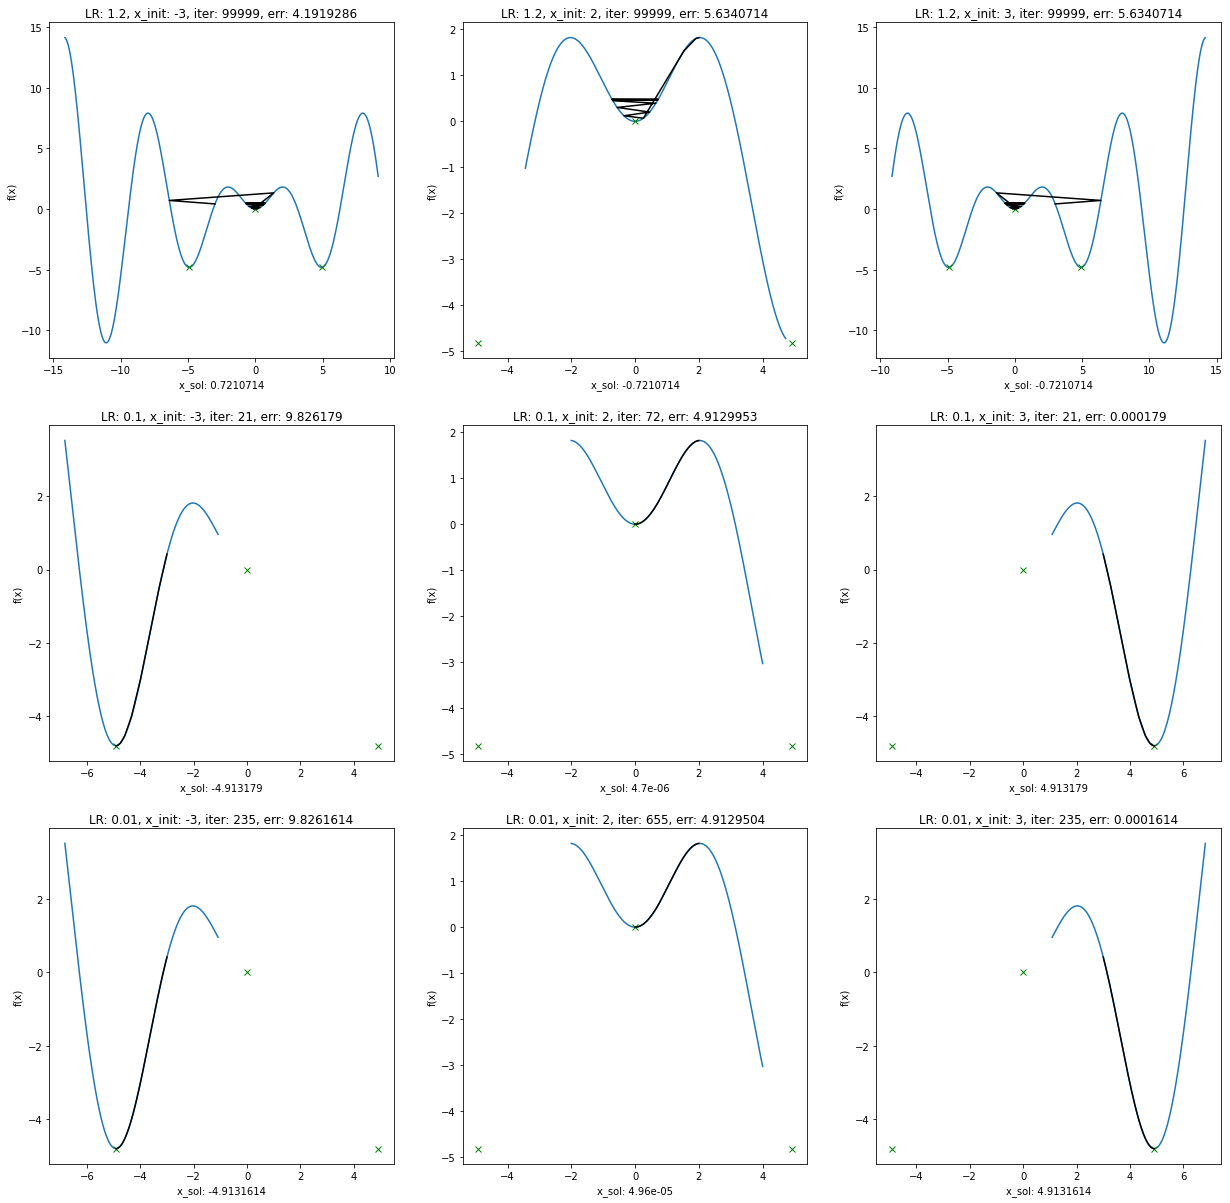

In [18]:
x = np.linspace(start=-10, stop=10, num=1000)

_lambda = [1.2, 0.1, 0.01]
x_init = [-3, 2, 3]
max_iter = int(1e5)
epsilon = 1e-6
max_val = int(1e4)
func = lambda X: X*np.sin(X)
grad = lambda x: np.sin(x) + x*np.cos(x)
sols = [4.913, -4.913, 0]

plotter(x, func, sols)

solver(_lambda, x_init, max_iter, epsilon, max_val, sols, grad, func)

#Find the value of $x$ and $y$ at which $f(x,y)$ is minimum :



**Example 1** : $f(x,y)$ = $x^{2}+y^{2}+2x+2y$

**Gradient Descent Method** :

Follow the below steps and write your code in the block below

1. Generate $x$ and $y$, 1000 data points from -10 to 10
2. Generate and Plot the function $f(x,y)$ = $x^{2}+y^{2}+2x+2y$
3. Initialize the starting point ($x_{init}$,$y_{init}$) and learning rate ($\lambda$)
4. Use Gradient descent algorithm to compute value of $x$ and $y$ at which the function $f(x,y)$ is minimum
5. Also vary the learning rate and initialisation point and plot your observations

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


---------------------------------------------------------------------------------------
The value of x and y at which the function f(x,y) is minimum is : -1.0000025711008707,-1.0000025711008707
---------------------------------------------------------------------------------------


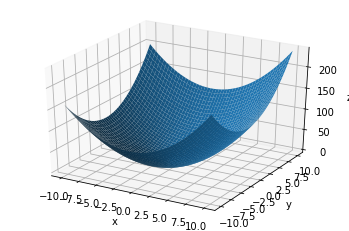

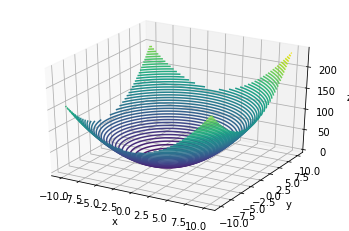

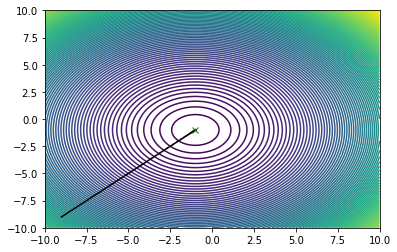

In [ ]:
## Write your code here (Ignore the warning)
x = np.linspace(start=-10, stop=10, num=1000)
y = np.linspace(start=-10, stop=10, num=1000)

_lambda = [1.2, 0.1, 0.01]
p_init = [(-9, -9), (5, 5), (10, -10)]
max_iter = int(1e5)
epsilon = 1e-6
max_val = int(1e4)
func = lambda X, Y: np.power(X, 2) + np.power(Y, 2) + 2*X + 2*Y
grad_x = lambda x, y: 2*x + 2*y + 2
grad_y = lambda x, y: 2*x + 2*y + 2
sols = [4.913, -4.913, 0]

solver_2D(_lambda, p_init, max_iter, epsilon, max_val, )

**Example 2** : $f(x,y)$ = $xsin(x)+ysin(y)$

**Gradient Descent Method** :

Follow the below steps and write your code in the block below

1. Generate $x$ and $y$, 1000 data points from -10 to 10
2. Generate and Plot the function $f(x,y)$ = $xsin(x)+ysin(y)$
3. Initialize the starting point ($x_{init}$,$y_{init}$) and learning rate ($\lambda$)
4. Use Gradient descent algorithm to compute value of $x$ and $y$ at which the function $f(x,y)$ is minimum
5. Also vary the learning rate and initialisation point and plot your observations

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


-------------------------------------------------------------------------------------------
The value of x and y at which the function f(x,y) is minimum : 0.0,-4.91318121457257
-------------------------------------------------------------------------------------------


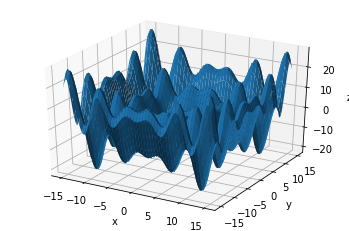

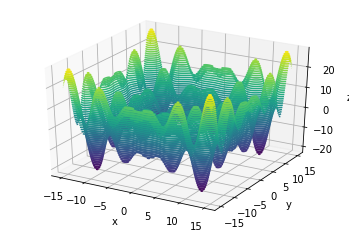

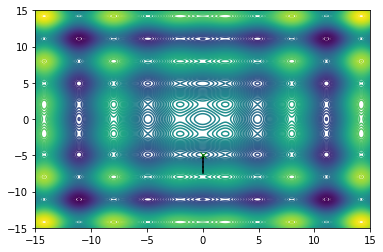

In [ ]:
## Write your code here (Ignore the warning)